In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [2]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/jevanchahal/dsc180b-capstone-q2/src/base/features.py'>

In [3]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)

In [4]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [5]:
all_features

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYME

In [6]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [7]:
all_features = pd.read_csv("../../data_q2/features.csv")
all_features = all_features.set_index('prism_consumer_id')

In [8]:
all_features

,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYMENTS_skewness,CREDI


LightGBM Results
ROC-AUC: 0.826 | Accuracy: 0.913
Training Time: 1.8s | Predicting Time: 0.000005s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.27      0.13      0.17       186

    accuracy                           0.91      2602
   macro avg       0.60      0.55      0.56      2602
weighted avg       0.89      0.91      0.90      2602



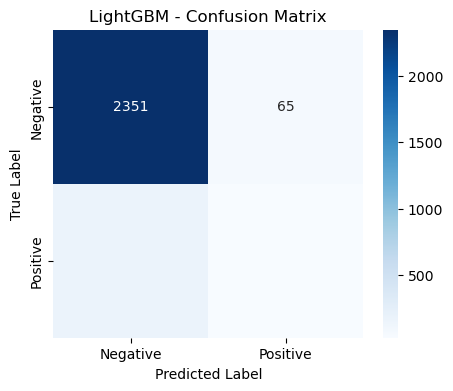


======================================== FINAL RESULTS ========================================
   model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
LightGBM 0.826221  0.912759   0.887936 0.912759  0.898232    1.751514      0.000005


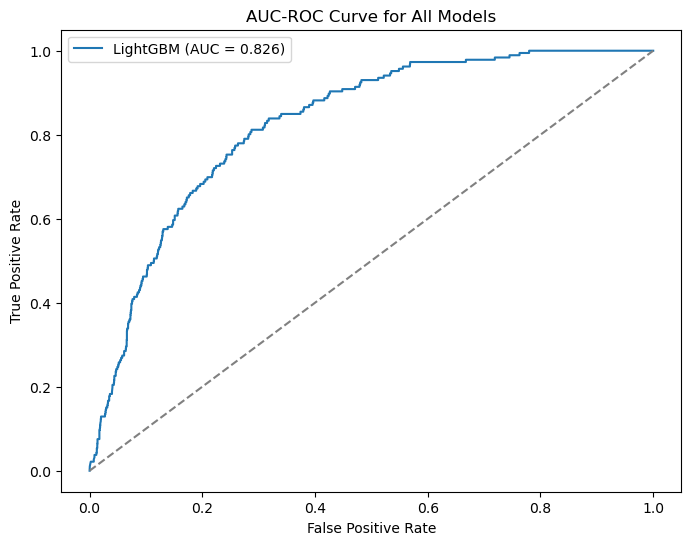

In [9]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

/opt/anaconda3/lib/python3.11/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


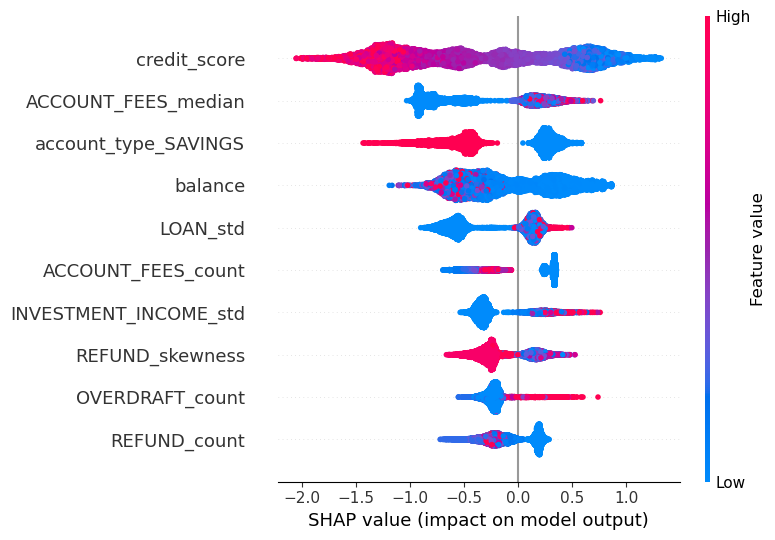

/Users/jevanchahal/dsc180b-capstone-q2/src/base/classify.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(average_shap.loc[features[i]])
/Users/jevanchahal/dsc180b-capstone-q2/src/base/classify.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  message += f"Increase {features[i]} "


In [ ]:
info = classify.individual_test(classification_features, "LightGBM", all_features, random_state=42)

In [12]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 100)


Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.074997    -0.249976
              account_type_SAVINGS    0.043947    -0.099071
                           balance    0.040157    -0.030563
                ACCOUNT_FEES_count    0.024911     0.020680
                  OVERDRAFT_median    0.022086     0.000407
               ACCOUNT_FEES_median    0.016250     0.001497
                   OVERDRAFT_count    0.015003     0.066101
                  ACCOUNT_FEES_std    0.014571    -0.000036
                       BNPL_median    0.012838     0.011102
                     OVERDRAFT_std    0.011839     0.014446
                        BNPL_count    0.011063     0.039151
                 SELF_TRANSFER_iqr    0.009681    -0.026766
                          BNPL_std    0.009655     0.034083
               SELF_TRANSFER_count    0.009500    -0.009936
                          LOAN_std    0.008996    -0.008749


/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(



Top Features (BalancedRandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.073433    -0.249976
              account_type_SAVINGS    0.041891    -0.099071
                           balance    0.041663    -0.030563
                ACCOUNT_FEES_count    0.023902     0.020680
                  OVERDRAFT_median    0.020194     0.000407
               ACCOUNT_FEES_median    0.019072     0.001497
                       BNPL_median    0.015481     0.011102
                  ACCOUNT_FEES_std    0.015257    -0.000036
                   OVERDRAFT_count    0.014934     0.066101
                 SELF_TRANSFER_iqr    0.014115    -0.026766
                          BNPL_std    0.010558     0.034083
               BNPL_coef_variation    0.009675     0.055512
                        BNPL_count    0.009308     0.039151
                          LOAN_std    0.008875    -0.008749
          ESSENTIAL_SERVICES_count    0.008479    -0


LightGBM Results
ROC-AUC: 0.817 | Accuracy: 0.917
Training Time: 0.9s | Predicting Time: 0.000005s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2416
         1.0       0.34      0.17      0.22       186

    accuracy                           0.92      2602
   macro avg       0.64      0.57      0.59      2602
weighted avg       0.90      0.92      0.90      2602



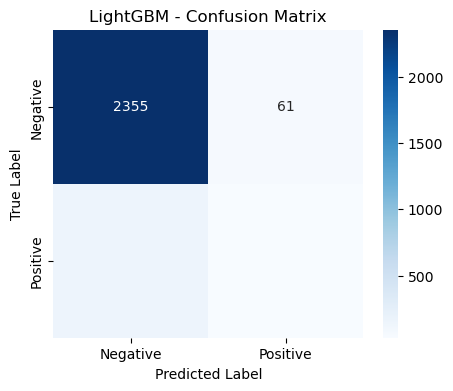


======================================== FINAL RESULTS ========================================
   model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
LightGBM 0.817241  0.916987   0.895265 0.916987  0.903744    0.874612      0.000005


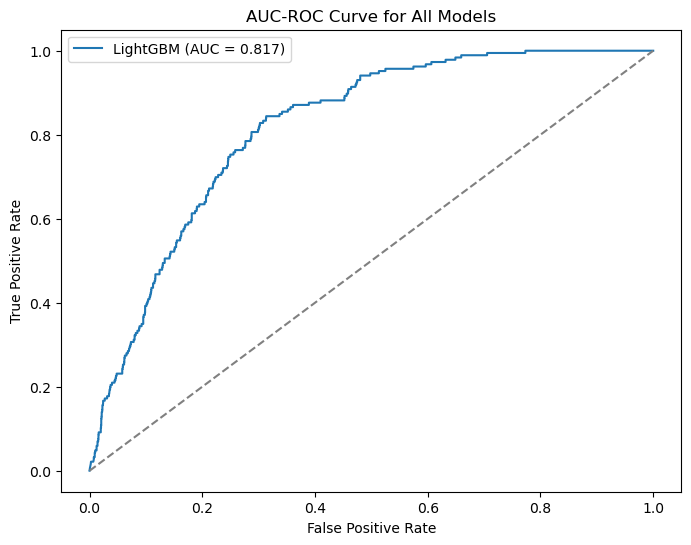

In [15]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)



Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.743
Training Time: 0.3s | Predicting Time: 0.000003s
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84      2416
         1.0       0.17      0.68      0.27       186

    accuracy                           0.74      2602
   macro avg       0.57      0.71      0.56      2602
weighted avg       0.91      0.74      0.80      2602



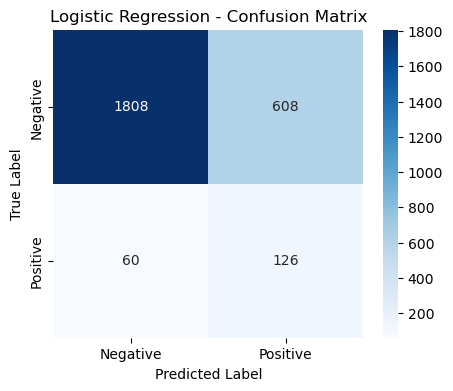


Random Forest Results
ROC-AUC: 0.800 | Accuracy: 0.915
Training Time: 14.4s | Predicting Time: 0.000088s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2416
         1.0       0.32      0.16      0.21       186

    accuracy                           0.92      2602
   macro avg       0.63      0.56      0.58      2602
weighted avg       0.89      0.92      0.90      2602



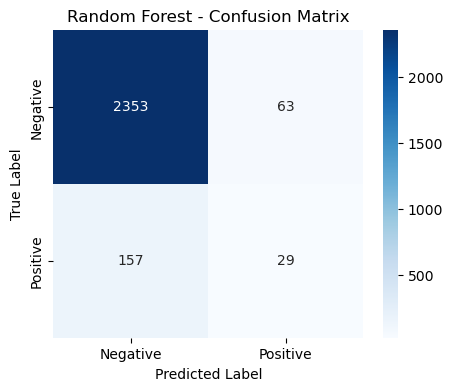


LightGBM Results
ROC-AUC: 0.832 | Accuracy: 0.914
Training Time: 2.2s | Predicting Time: 0.000018s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.28      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.61      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602



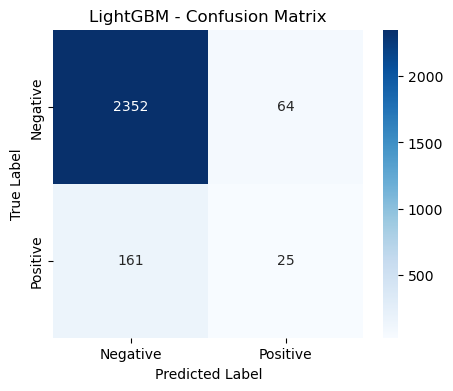


Balanced RF Results
ROC-AUC: 0.800 | Accuracy: 0.914
Training Time: 13.7s | Predicting Time: 0.000034s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.29      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.61      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602



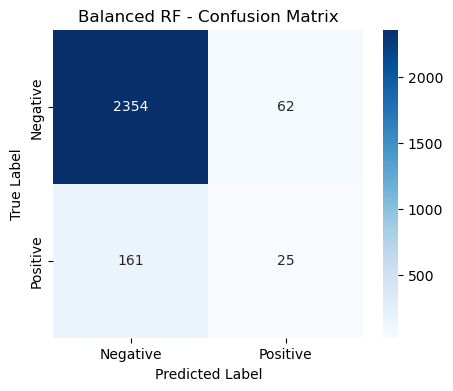


XGBoost Results
ROC-AUC: 0.818 | Accuracy: 0.914
Training Time: 1.6s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.31      0.16      0.21       186

    accuracy                           0.91      2602
   macro avg       0.62      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



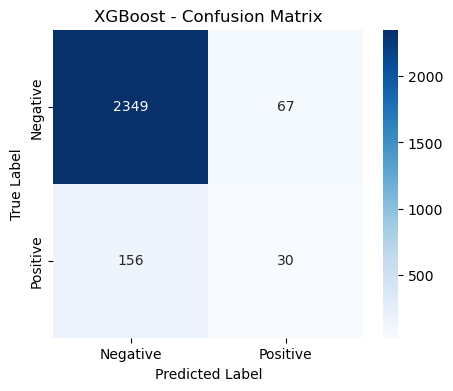


CatBoost Results
ROC-AUC: 0.821 | Accuracy: 0.917
Training Time: 14.5s | Predicting Time: 0.000005s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.32      0.15      0.20       186

    accuracy                           0.92      2602
   macro avg       0.63      0.56      0.58      2602
weighted avg       0.89      0.92      0.90      2602



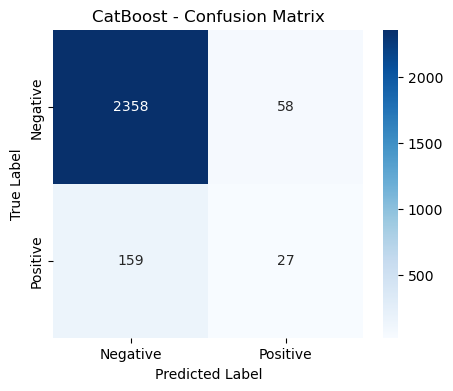


HistGB Results
ROC-AUC: 0.823 | Accuracy: 0.913
Training Time: 3.2s | Predicting Time: 0.000021s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.30      0.16      0.21       186

    accuracy                           0.91      2602
   macro avg       0.62      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



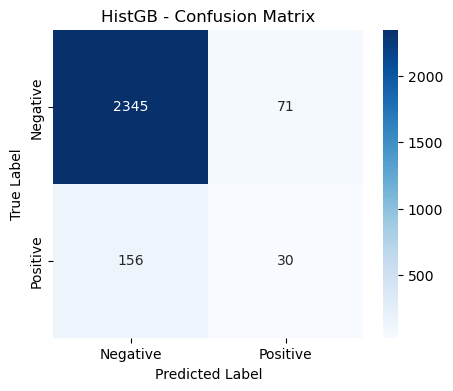


RUSBoost Results
ROC-AUC: 0.802 | Accuracy: 0.829
Training Time: 7.0s | Predicting Time: 0.000012s
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      2416
         1.0       0.21      0.49      0.29       186

    accuracy                           0.83      2602
   macro avg       0.58      0.67      0.60      2602
weighted avg       0.90      0.83      0.86      2602



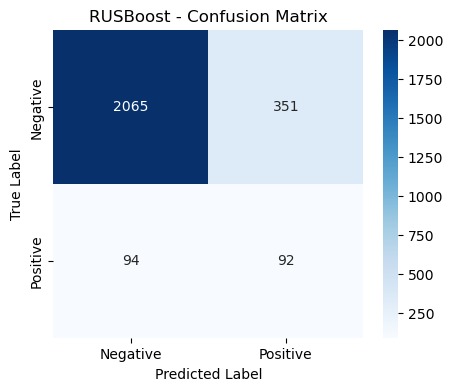


======================================== FINAL RESULTS ========================================
              model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
           LightGBM 0.832238  0.913528   0.889109 0.913528  0.899128    2.207812      0.000018
             HistGB 0.822790  0.912759   0.891833 0.912759  0.900595    3.195762      0.000021
           CatBoost 0.821119  0.916603   0.892568 0.916603  0.901916   14.511365      0.000005
            XGBoost 0.817867  0.914297   0.892801 0.914297  0.901595    1.634547      0.000006
           RUSBoost 0.801726  0.828978   0.902935 0.828978  0.859113    6.954459      0.000012
        Balanced RF 0.799938  0.914297   0.889618 0.914297  0.899617   13.669721      0.000034
      Random Forest 0.799520  0.915450   0.892971 0.915450  0.901962   14.364438      0.000088
Logistic Regression 0.776687  0.743274   0.910964 0.743274  0.803314    0.348290      0.000003


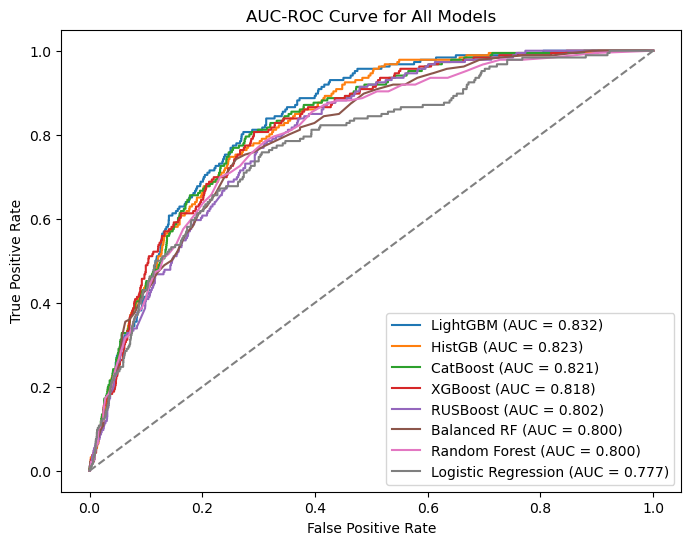

In [13]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)


In [14]:
classify.individual_test(best_features[2], all_features)

FileNotFoundError: [Errno 2] No such file or directory: 'Random Forest.joblib'